<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


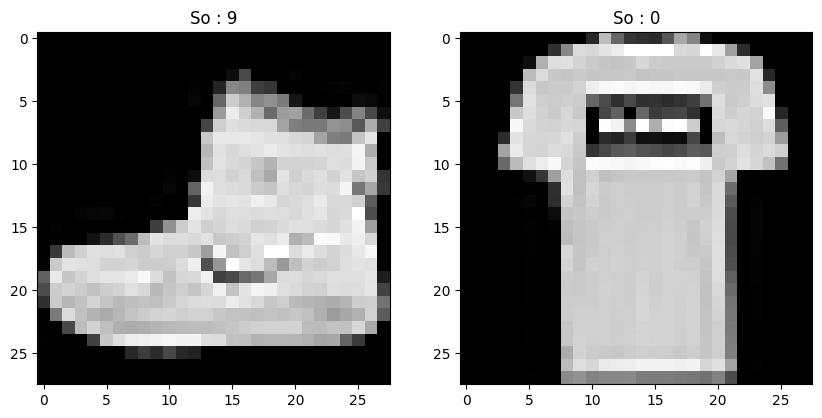

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10,10])

plt.subplot(121)
plt.imshow(x_train[0], cmap = 'gray')
plt.title('So : {}'.format(y_train[0]))

plt.subplot(122)
plt.imshow(x_train[1], cmap = 'gray')
plt.title('So : {}'.format(y_train[1]))

plt.show()

In [13]:
train_X = x_train.reshape(60000,28,28,1)
test_X = x_test.reshape(10000,28,28,1)
print(train_X.shape)
print(test_X.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
train_X = train_X.astype('float32')
train_X = train_X / 255

In [15]:
from keras.utils import to_categorical
train_Y = to_categorical(y_train)
test_Y = to_categorical(y_test)

In [40]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [22]:
batch_size = 64
epochs = 20
classes = 10

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (28,28,1), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                 

In [43]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 137s 145ms/step - loss: 0.4005 - accuracy: 0.8548
Epoch 2/20
938/938 [==============================] - 134s 143ms/step - loss: 0.2553 - accuracy: 0.9060
Epoch 3/20
938/938 [==============================] - 135s 144ms/step - loss: 0.2129 - accuracy: 0.9209
Epoch 4/20
938/938 [==============================] - 129s 138ms/step - loss: 0.1825 - accuracy: 0.9321
Epoch 5/20
938/938 [==============================] - 130s 138ms/step - loss: 0.1585 - accuracy: 0.9415
Epoch 6/20
938/938 [==============================] - 131s 139ms/step - loss: 0.1343 - accuracy: 0.9494
Epoch 7/20
938/938 [==============================] - 137s 146ms/step - loss: 0.1120 - accuracy: 0.9589
Epoch 8/20
938/938 [==============================] - 135s 144ms/step - loss: 0.0965 - accuracy: 0.9634
Epoch 9/20
938/938 [==============================] - 141s 150ms/step - loss: 0.0779 - accuracy: 0.9710
Epoch 10/20
938/938 [==============================] - 130s 139m

In [46]:
model.save('/content/drive/MyDrive/save_model/modelfashionmnist.h5')

In [ ]:
#from keras.models import load_model

#model100=load_model('/content/drive/MyDrive/colab/model_fashion.h5')

Test loss:  125.56334686279297
Test accuaracy:  0.8844000101089478


Text(0.5, 1.0, 'Training & Test Accuracy')

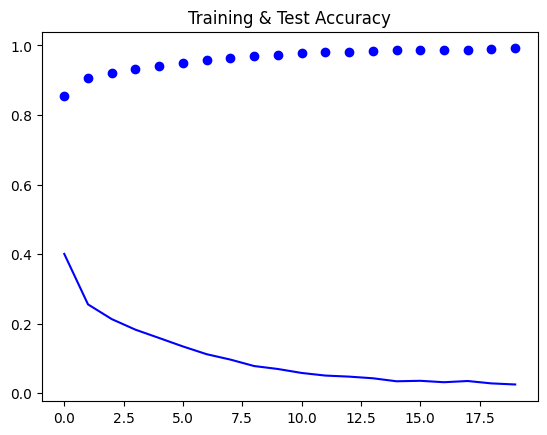

In [51]:
eval = model.evaluate(test_X, test_Y, verbose = 0)
print('Test loss: ', eval[0])
print('Test accuaracy: ', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, loss, 'b')
plt.title('Training & Test Accuracy')
